### Importing some required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix, recall_score, roc_curve

In [2]:
data = pd.read_csv('../Data_for_UCI_named.csv')

In [57]:
data.head(20)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [47]:
#Confirming we have no missing data
data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

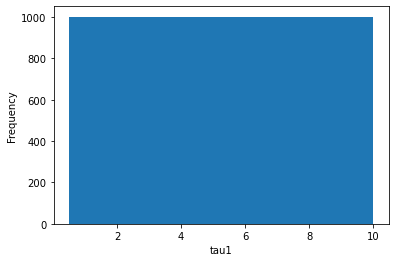

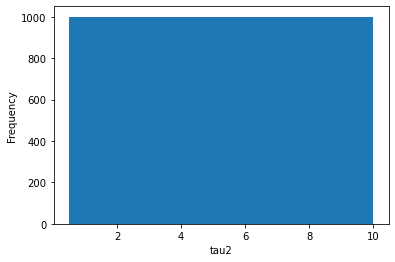

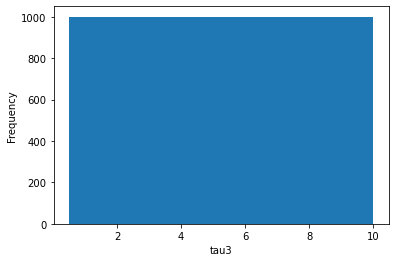

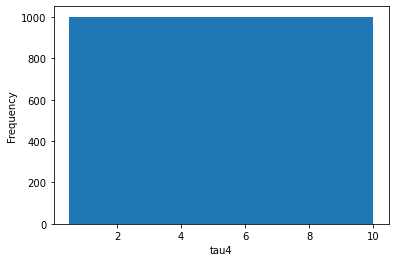

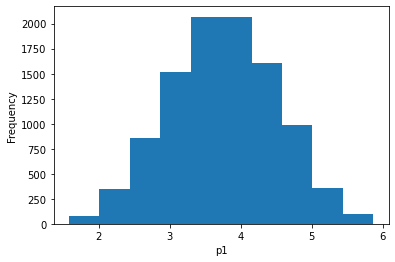

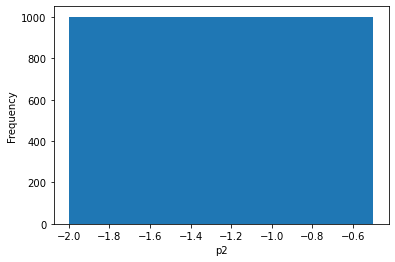

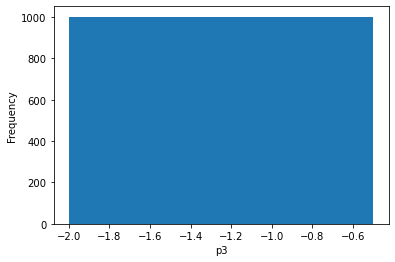

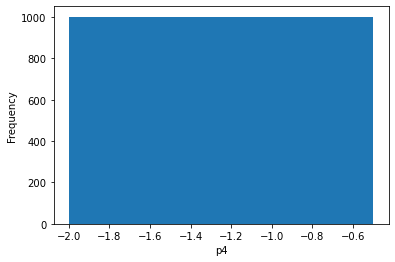

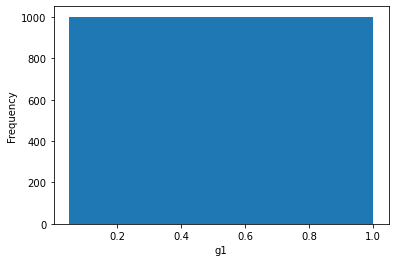

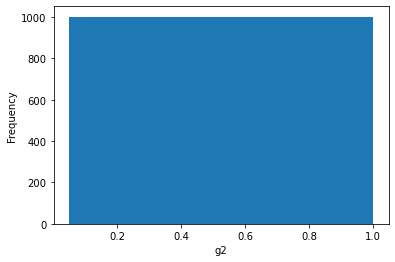

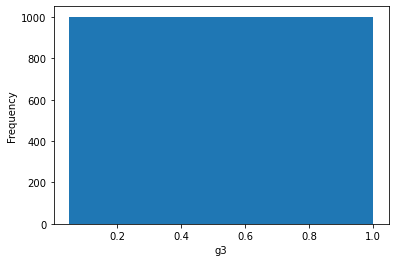

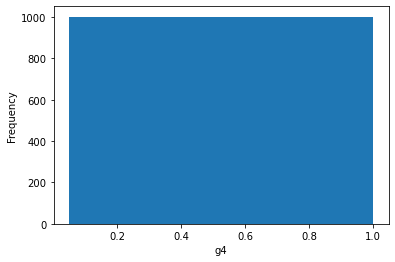

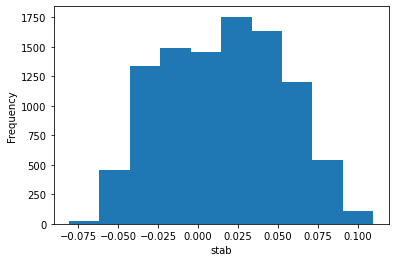

In [7]:
for i, cols in enumerate(data.drop('stabf', axis=1).columns):
    data[cols].plot.hist()
    plt.xlabel(cols)
    plt.show()

Only p1 - Nominal Power Produced and Numerical value of degree of stability tends to be normally dsitributed values we have in this dataset

In [8]:
data.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

Just like an unideal type of life, we have more unstable power grids

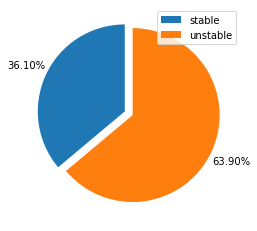

In [9]:
p1_gdata = data.groupby('stabf').sum()['p1'].to_frame().reset_index()
plt.pie(data=p1_gdata, x='p1', explode=[0.1, 0.0], startangle=90, autopct="%1.2f%%", pctdistance=1.25)
plt.legend(p1_gdata.stabf)

It turns out that about 64% of nominal power produced are from unstable grids

### Checking distribtuion of nominal power produced by stability

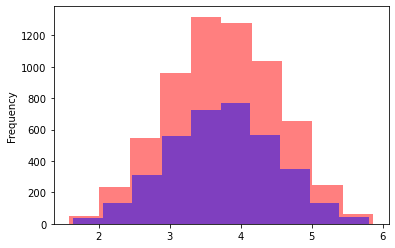

In [10]:
fig1 = plt.figure(figsize=(6,4))
ax = fig1.add_subplot(111)
data[data.stabf == 'unstable'].p1.plot.hist(color='red', ax=ax, alpha=0.5)
data[data.stabf != 'unstable'].p1.plot.hist(color='blue', ax=ax, alpha=0.5)

Just as closely explained in the pie chart above, unstable grids tends to generate and supply more power than stable grids

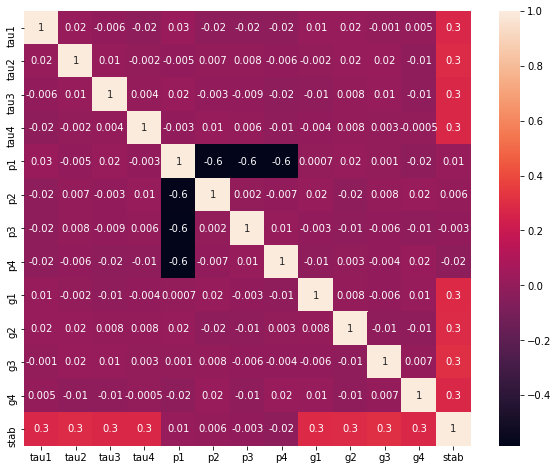

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=data.corr(), fmt=".1g")

### Literally stabbing stab in the back ;) by dropping it. Just needed it for correlation.

From the looks of corellation, It doesn't seem like a linear regreesion or logistic regression 
will do a great job at modelling this dataset. There doesn't seem to be a high correlation metric between all variables and stab.
The whole p1-p4 seems close to being highly corellated with one another.

In [12]:
data_2 = data.drop('stab', axis=1)
data_2.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [55]:
#Splitting data into train and test set
X = data_2.drop('stabf', axis=1)
y = data_2.stabf
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [56]:
#Scalling the train and test set with standard scaler
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# Note: I took 'stable' as my 'positive label'

### Venturing into a "Random Forest" - Story of a model

In [15]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [16]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train_scaled, y_train)
rfc_pred = rfc.predict(x_test_scaled)
rfc_acc = accuracy_score(y_test, rfc_pred)
rfc_precision = precision_score(y_test, rfc_pred, pos_label='stable')
rfc_recall = recall_score(y_test, rfc_pred, pos_label='stable')
rfc_f1score = f1_score(y_test, rfc_pred, pos_label='stable')

In [17]:
print(" rfc_Accuracy:",rfc_acc, "\n rfc_Precision: ",rfc_precision, "\n rfc_Recall:",rfc_recall, "\n rfc_F1 Score:",rfc_f1score)

 rfc_Accuracy: 0.929 
 rfc_Precision:  0.9191176470588235 
 rfc_Recall: 0.8778089887640449 
 rfc_F1 Score: 0.8979885057471264


### Picking up "Extra Trees" along the way

In [18]:
etc = ExtraTreesClassifier(random_state=1)
etc.fit(x_train_scaled, y_train)
etc_pred = etc.predict(x_test_scaled)
etc_acc = accuracy_score(y_test, etc_pred)
etc_precision = precision_score(y_test, etc_pred, pos_label='stable')
etc_recall = recall_score(y_test, etc_pred, pos_label='stable')
etc_f1score = f1_score(y_test, etc_pred, pos_label='stable')

In [19]:
print(" etc_Accuracy:",etc_acc, "\n etc_Precision: ",etc_precision, "\n etc_Recall:",etc_recall, "\n etc_F1 Score:",etc_f1score)

 etc_Accuracy: 0.928 
 etc_Precision:  0.9409937888198758 
 etc_Recall: 0.851123595505618 
 etc_F1 Score: 0.8938053097345133


### And then we found some fruits to "Xtremely Boost" our model

In [20]:
from xgboost import XGBClassifier

In [21]:
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train_scaled, y_train)
xgb_pred = xgb.predict(x_test_scaled)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, pos_label='stable')
xgb_recall = recall_score(y_test, xgb_pred, pos_label='stable')
xgb_f1score = f1_score(y_test, xgb_pred, pos_label='stable')

In [22]:
print(" xgb_Accuracy:",xgb_acc, "\n xgb_Precision: ",xgb_precision, "\n xgb_Recall:",xgb_recall, "\n xgb_F1 Score:",xgb_f1score)

 xgb_Accuracy: 0.9195 
 xgb_Precision:  0.9206106870229007 
 xgb_Recall: 0.8469101123595506 
 xgb_F1 Score: 0.8822238478419898


### Checking out a Light Gradient Boosting Model

In [24]:
import lightgbm as lgb

#Converting the y_train to binary. Lightgbm seems to want it that way. Seems she has her own taste. 
lgb_y_train = np.where(y_train=='stable', 1, 0)

#Defining the train data to be used and converting into a numpy data type
train_data = lgb.Dataset(data=x_train_scaled.values, label=lgb_y_train)

In [25]:
#Setting it's default parameters
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = 'auc'
#Training.... More of like fitting in other sklearn models...
bst = lgb.train(params=param, train_set=train_data)
# Getting predictions from test set
bst_pred = bst.predict(x_test_scaled)

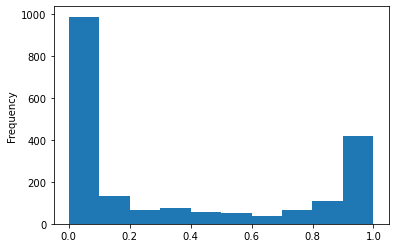

In [26]:
#Checking the prediction's (in probablity) distribution.
pd.Series(bst_pred).plot(kind='hist')

In [27]:
# Converting back to categories
lgb_y_pred = np.where(bst_pred>=0.5, 'stable', 'unstable')

In [28]:
lgb_acc = accuracy_score(y_test, lgb_y_pred)
lgb_precision = precision_score(y_test, lgb_y_pred, pos_label='stable')
lgb_recall = recall_score(y_test, lgb_y_pred, pos_label='stable')
lgb_f1score = f1_score(y_test, lgb_y_pred, pos_label='stable')

In [29]:
print(" lgb_Accuracy:",lgb_acc, "\n lgb_Precision: ",lgb_precision, "\n lgb_Recall:",lgb_recall, "\n lgb_F1 Score:",lgb_f1score)

 lgb_Accuracy: 0.9375 
 lgb_Precision:  0.9297218155197657 
 lgb_Recall: 0.8918539325842697 
 lgb_F1 Score: 0.910394265232975


### Now on RandomizedSearchCV ... Working with the Extra Trees we found along the way

In [60]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
rscv = RandomizedSearchCV(etc, param_distributions=hyperparameter_grid, random_state=1,
                         cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1)
rscv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [61]:
# Checking the best parameters
rscv.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [32]:
# Predicting and scoring
rscv_pred = rscv.predict(x_test_scaled)
rscv_acc = accuracy_score(y_test, rscv_pred)
rscv_precision = precision_score(y_test, rscv_pred, pos_label='stable')
rscv_recall = recall_score(y_test, rscv_pred, pos_label='stable')
rscv_f1score = f1_score(y_test, rscv_pred, pos_label='stable')

In [33]:
print(" rscv_Accuracy:",rscv_acc, "\n rscv_Precision: ",rscv_precision, "\n rscv_Recall:",rscv_recall, "\n rscv_F1 Score:",rscv_f1score)

 rscv_Accuracy: 0.927 
 rscv_Precision:  0.9211309523809523 
 rscv_Recall: 0.8693820224719101 
 rscv_F1 Score: 0.8945086705202311


### Tabularizing the result of all models

In [35]:
rscv_scores = [rscv_acc, rscv_precision, rscv_recall, rscv_f1score]
lgb_scores = [lgb_acc, lgb_precision, lgb_recall, lgb_f1score]
etc_scores = [etc_acc, etc_precision, etc_recall, etc_f1score]
rfc_scores = [rfc_acc, rfc_precision, rfc_recall, rfc_f1score]
xgb_scores = [xgb_acc, xgb_precision, xgb_recall, xgb_f1score]

In [36]:
scores_np = np.array([rscv_scores, lgb_scores, etc_scores, rfc_scores, xgb_scores])

In [37]:
scores_np

array([[0.927     , 0.92113095, 0.86938202, 0.89450867],
       [0.9375    , 0.92972182, 0.89185393, 0.91039427],
       [0.928     , 0.94099379, 0.8511236 , 0.89380531],
       [0.929     , 0.91911765, 0.87780899, 0.89798851],
       [0.9195    , 0.92061069, 0.84691011, 0.88222385]])

In [39]:
scores_df = pd.DataFrame(scores_np, columns=['Accuracy', 'Precision', 'Recall', 'F1_Score'], 
                         index=['RandomizedSearchCV', 'LightGBM', 'ExtraTrees', 'RandomForests', 'XGBoost'])

In [40]:
scores_df

,Accuracy,Precision,Recall,F1_Score
RandomizedSearchCV,0.9270,0.921131,0.869382,0.894509
LightGBM,0.9375,0.929722,0.891854,0.910394
ExtraTrees,0.9280,0.940994,0.851124,0.893805
RandomForests,0.9290,0.919118,0.877809,0.897989
XGBoost,0.9195,0.920611,0.846910,0.882224


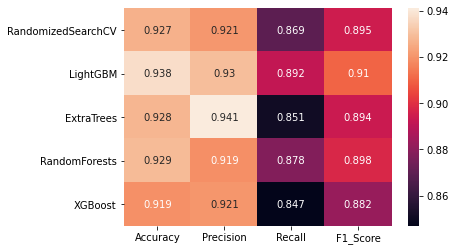

In [45]:
sns.heatmap(scores_df, annot=scores_np, fmt='.3g')

Finally!!!. From the look of things and depending on the scoring metric we decide to use.
- LightGBM turned out to be the best when accuracy is being considered.
- ExtraTrees is best when precision is being considered.
- LightGBM when cosidering Recall or TPR
- LightGBM for F1_score

In [66]:
etc_2 = ExtraTreesClassifier(bootstrap = False,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion='gini',
 max_depth= None,
 max_features= None,
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_impurity_split= None,
 min_samples_leaf= 8,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 1000,
 n_jobs=None,
 oob_score= False,
 random_state= 1,
 verbose= 0,
 warm_start= False)
etc_2.fit(x_train_scaled, y_train)
etc_2_pred = etc_2.predict(x_test_scaled)
etc_2_acc = accuracy_score(y_test, etc_2_pred)
etc_2_precision = precision_score(y_test, etc_2_pred, pos_label='stable')
etc_2_recall = recall_score(y_test, etc_2_pred, pos_label='stable')
etc_2_f1score = f1_score(y_test, etc_2_pred, pos_label='stable')

In [67]:
print(" etc_2_Accuracy:",etc_2_acc, "\n etc_2_Precision: ",etc_2_precision, "\n etc_2_Recall:",etc_2_recall, "\n etc_2_F1 Score:",etc_2_f1score)

 etc_2_Accuracy: 0.927 
 etc_2_Precision:  0.9211309523809523 
 etc_2_Recall: 0.8693820224719101 
 etc_2_F1 Score: 0.8945086705202311


In [74]:
etc_feat_importance = pd.DataFrame({'features': x_train_scaled.columns, 'importance': etc.feature_importances_})
etc_feat_importance.sort_values('importance')

,features,importance
8,0.089783,g1
9,0.093676,g2
10,0.096883,g3
11,0.094019,g4
4,0.039507,p1
5,0.040371,p2
6,0.040706,p3
7,0.040579,p4
0,0.117397,tau1
1,0.118445,tau2
